```{contents}
```

# Intiution

KNN is a **lazy, instance-based algorithm** used for classification and regression. Its core idea is:

> "To predict the label of a new data point, look at the ‘k’ closest points in the training data and take a majority vote (for classification) or average (for regression)."

Think of it like this:

* You move into a new neighborhood.
* You want to know whether it’s mostly families or students living there.
* You look at the nearest `k` houses.
* If most of them are families, you conclude your house is likely in a family-dominated area.

## **Geometrical Intuition**

1. **Data as points in space**

   * Imagine every data sample as a **point** in an $n$-dimensional space (where $n$ = number of features).
   * Example: If you have two features (height, weight), each person is a **point in 2D plane**.

2. **Closeness = Similarity**

   * When you want to predict a new point, you look at the **nearest K neighbors**.
   * "Nearness" is computed by a **distance metric** (Euclidean, Manhattan, cosine similarity, etc.).

3. **Majority voting (classification)**

   * If most of the nearest neighbors are of class "A", the new point is classified as "A".
   * Geometrically, this means:

     > The **decision boundary** between classes is formed by **Voronoi regions** (each point belongs to the region of its nearest training samples).

4. **Averaging (regression)**

   * If predicting a continuous value, the output is the **average (or weighted average)** of neighbor values.
   * Geometrically, this means you’re smoothing values across local neighborhoods.

---

## **Mathematical Intuition of KNN**

Suppose we want to predict the label $\hat{y}$ of a new point $x$.

### **1. Distance Computation**

For each training point $x^{(i)}$:

$$
d(x, x^{(i)}) = \sqrt{\sum_{j=1}^{n} (x_j - x^{(i)}_j)^2}
$$

* This is Euclidean distance (but could be Manhattan, cosine, etc.).

---

### **2. Neighbor Selection**

* Sort all training points by distance to $x$.
* Pick the **K nearest points** → call this set $N_k(x)$.

---

### **3A. Classification Rule**

The predicted class is:

$$
\hat{y} = \arg\max_{c \in \mathcal{C}} \sum_{x^{(i)} \in N_k(x)} \mathbf{1}(y^{(i)} = c)
$$

where:

* $\mathcal{C}$ = set of classes
* $\mathbf{1}(\cdot)$ = indicator function (1 if true, else 0)
* It’s just **majority voting**.

If we use **distance weighting** (closer neighbors count more):

$$
\hat{y} = \arg\max_{c \in \mathcal{C}} \sum_{x^{(i)} \in N_k(x)} \frac{1}{d(x, x^{(i)})} \cdot \mathbf{1}(y^{(i)} = c)
$$

---

### **3B. Regression Rule**

The prediction is the **average of neighbors**:

$$
\hat{y} = \frac{1}{K} \sum_{x^{(i)} \in N_k(x)} y^{(i)}
$$

Or, with **distance weighting**:

$$
\hat{y} = \frac{\sum_{x^{(i)} \in N_k(x)} \frac{1}{d(x, x^{(i)})} \cdot y^{(i)}}{\sum_{x^{(i)} \in N_k(x)} \frac{1}{d(x, x^{(i)})}}
$$

---

**Summary**

* **Geometrical view**:

  * Data = points in space.
  * Predictions = decided by local neighbors.
  * Decision boundary = Voronoi regions.

* **Mathematical view**:

  * Compute distances.
  * Select $K$ neighbors.
  * Use **majority vote** (classification) or **average** (regression).



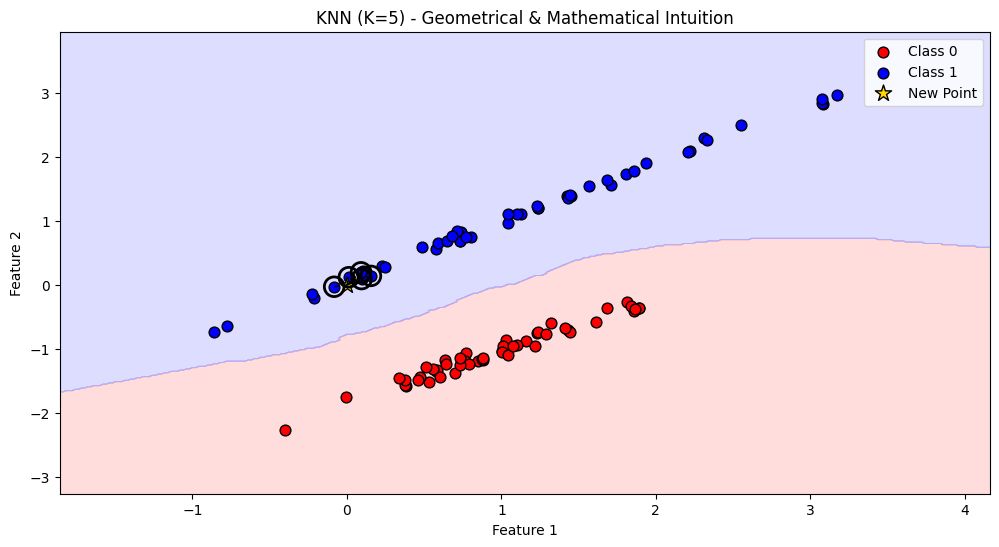

In [1]:
# Re-import required libraries after reset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic dataset
X, y = make_classification(
    n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)

# Fit KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create meshgrid for decision boundary visualization
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predictions for meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Colors
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#0000FF']

# Plot decision boundary
plt.figure(figsize=(12, 6))

plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)

# Plot training points
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(
        X[y == cl, 0], X[y == cl, 1],
        c=cmap_bold[idx], label=f"Class {cl}", edgecolor="k", s=60
    )

# Pick a new test point
test_point = np.array([[0, 0]])

# Find neighbors
distances, indices = knn.kneighbors(test_point)

# Plot the test point
plt.scatter(test_point[:, 0], test_point[:, 1], c="gold", edgecolor="k", s=150, marker="*",
            label="New Point")

# Plot neighbors with circles
for i in indices[0]:
    plt.plot([test_point[0, 0], X[i, 0]], [test_point[0, 1], X[i, 1]], "k--", lw=1)
    plt.scatter(X[i, 0], X[i, 1], s=200, facecolors='none', edgecolors='black', linewidth=2)

plt.title("KNN (K=5) - Geometrical & Mathematical Intuition")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
